In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist_datatset = tf.keras.datasets.mnist
(x_train, y_train), (x_val, y_val) = mnist_datatset.load_data()

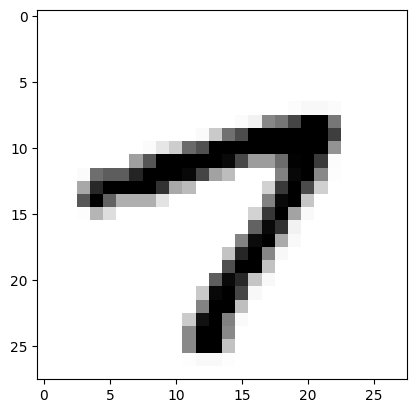

In [3]:
plt.imshow(x_train[101], cmap = plt.cm.binary)
plt.show()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_val = tf.keras.utils.normalize(x_val, axis = 1)

In [5]:
NN = tf.keras.models.Sequential()

In [6]:
NN.add(tf.keras.layers.Flatten())
NN.add(tf.keras.layers.Dense(128, activation='relu'))
NN.add(tf.keras.layers.Dense(128, activation='relu'))
NN.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [7]:
NN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
NN.fit(x_train, y_train, epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 2s 987us/step - loss: 0.2647 - accuracy: 0.9230
Epoch 2/4
1875/1875 [==============================] - 2s 942us/step - loss: 0.1079 - accuracy: 0.9668
Epoch 3/4
1875/1875 [==============================] - 2s 944us/step - loss: 0.0727 - accuracy: 0.9769
Epoch 4/4
1875/1875 [==============================] - 2s 967us/step - loss: 0.0534 - accuracy: 0.9827


In [9]:
loss, accuracy = NN.evaluate(x_val, y_val)
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

313/313 [==============================] - 0s 649us/step - loss: 0.1007 - accuracy: 0.9700
Loss : 0.10066360980272293
Accuracy : 0.9700000286102295


In [10]:
NN.save('mnist_number_predictor')

INFO:tensorflow:Assets written to: mnist_number_predictor\assets


INFO:tensorflow:Assets written to: mnist_number_predictor\assets


In [11]:
model = tf.keras.models.load_model('mnist_number_predictor')

In [12]:
prediction = model.predict([x_val])
print(prediction)

313/313 [==============================] - 0s 683us/step
[[2.6711254e-04 9.1328807e-03 7.3827350e-01 ... 9.9999869e-01
  4.2813702e-04 1.4797956e-01]
 [7.6962304e-03 5.7426989e-01 9.9999678e-01 ... 3.9751464e-04
  2.0687438e-03 2.6096228e-07]
 [8.5982597e-03 9.9974716e-01 5.3630970e-02 ... 9.5204838e-02
  3.3110955e-01 2.1460485e-03]
 ...
 [3.7671853e-05 2.4718143e-02 7.7777612e-04 ... 3.1591770e-01
  4.2028069e-02 8.7145507e-01]
 [8.5924834e-02 5.6249369e-03 6.2842428e-04 ... 1.4367872e-02
  9.0548104e-01 4.5665729e-04]
 [1.7769916e-02 5.2891258e-04 8.6165365e-04 ... 1.1111976e-07
  2.6630331e-02 2.4222732e-04]]


In [13]:
print(np.argmax(prediction[101]))

0


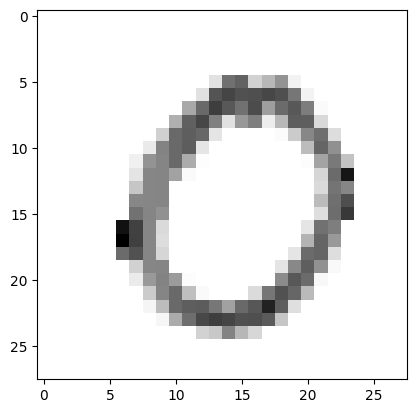

In [14]:
plt.imshow(x_val[101], cmap = plt.cm.binary)
plt.show()